In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pprint

from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
boston = load_boston()

In [3]:
pprint.pprint(boston)

{'DESCR': '.. _boston_dataset:\n'
          '\n'
          'Boston house prices dataset\n'
          '---------------------------\n'
          '\n'
          '**Data Set Characteristics:**  \n'
          '\n'
          '    :Number of Instances: 506 \n'
          '\n'
          '    :Number of Attributes: 13 numeric/categorical predictive. '
          'Median Value (attribute 14) is usually the target.\n'
          '\n'
          '    :Attribute Information (in order):\n'
          '        - CRIM     per capita crime rate by town\n'
          '        - ZN       proportion of residential land zoned for lots '
          'over 25,000 sq.ft.\n'
          '        - INDUS    proportion of non-retail business acres per '
          'town\n'
          '        - CHAS     Charles River dummy variable (= 1 if tract '
          'bounds river; 0 otherwise)\n'
          '        - NOX      nitric oxides concentration (parts per 10 '
          'million)\n'
          '        - RM       average num

In [4]:
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target)
df_y.columns = ['HOUSING PRICE']
pd.concat([df_x, df_y], axis=1).to_csv('Boston.csv', sep = ',', index = False)

In [5]:
# An alternative function to call - better stats description
from statsmodels.api import OLS
model_LR = OLS(df_y, df_x).fit()
model_LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          HOUSING PRICE   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Sat, 05 Jun 2021   Prob (F-statistic):                        0.00
Time:                        17:57:48   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4)

In [7]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
results = model.predict(x_test)

In [8]:
print(np.c_[y_test.values, results][0:5,:])

[[16.5        12.07495986]
 [24.8        26.9894969 ]
 [17.4        17.58803353]
 [19.3        18.15584511]
 [37.6        36.92091659]]


In [9]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_train,y_train)
print('R2 sq: ', model_score)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, results))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, results))

R2 sq:  0.7415244219726307
Mean squared error: 25.42
Test Variance score: 0.73


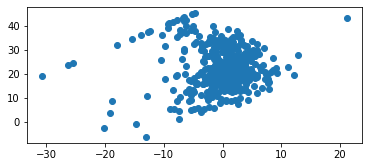

In [10]:
pred_val = model_LR.fittedvalues.copy()
residual = pred_val - df_y.values.flatten()

fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(residual, pred_val)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


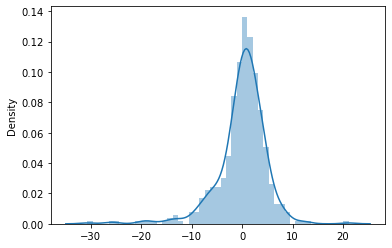

In [11]:
sns.distplot(residual);

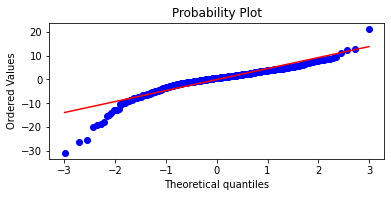

In [12]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

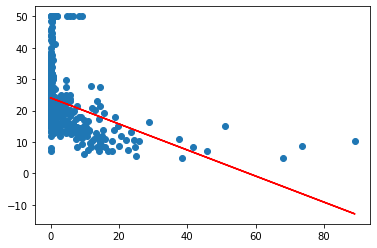

In [21]:
# Examining simple linear regression...

#X = df_x['CRIM'].values.reshape(-1, 1)
X = df_x.iloc[:,0].values.reshape(-1, 1)
#X = df_x['RM'].values.reshape(-1, 1)
#X = df_x.iloc[:,5].values.reshape(-1, 1)
Y = df_y.values.reshape(-1,1)

model3 = linear_model.LinearRegression()
model3.fit(X,Y)
Y_pred = model3.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()